# Congressional Voting

**Kaggle: 184.702 TU ML WS 20**

**Goal: Predict the party of a congress member.**

### Import Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectPercentile, chi2, SelectFromModel
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import time

### Get the Data

In [68]:
data = pd.read_csv('./184702-tu-ml-ws-20-congressional-voting/CongressionalVotingID.shuf.lrn.csv')

In [69]:
data

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,171,democrat,y,n,y,n,n,n,unknown,y,y,unknown,n,n,n,n,y,unknown
1,46,democrat,y,y,y,n,n,n,y,y,unknown,n,y,n,n,n,y,unknown
2,429,democrat,unknown,unknown,unknown,n,n,n,y,y,y,y,n,n,y,n,y,y
3,266,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
4,176,democrat,n,y,y,n,n,n,y,y,y,y,n,n,n,n,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,320,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,unknown
214,277,republican,n,n,n,y,y,y,n,n,n,n,n,y,y,y,y,n
215,70,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
216,168,republican,y,n,y,y,y,y,y,y,n,y,y,y,n,y,y,y


### Basic Data Information

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      218 non-null    int64 
 1   class                                   218 non-null    object
 2   handicapped-infants                     218 non-null    object
 3   water-project-cost-sharing              218 non-null    object
 4   adoption-of-the-budget-resolution       218 non-null    object
 5   physician-fee-freeze                    218 non-null    object
 6   el-salvador-aid                         218 non-null    object
 7   religious-groups-in-schools             218 non-null    object
 8   anti-satellite-test-ban                 218 non-null    object
 9   aid-to-nicaraguan-contras               218 non-null    object
 10  mx-missile                              218 non-null    object
 11  immigr

In [71]:
data.describe(include = 'object')

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,135,120,102,129,125,108,132,126,126,105,113,133,115,106,126,112,135


### Remove identifiers

In [72]:
idsTrain = data['ID'].to_frame()
data = data.drop('ID',axis=1)

### Missing Data

**Replace 'unknown' for a recognised variable**

In [73]:
data.replace("unknown", np.nan, inplace = True)

**Missing data per feature**

In [74]:
missing_values_feature = data.isnull().sum(axis=0)
missing_values_feature

class                                      0
handicapped-infants                        4
water-project-cost-sharing                20
adoption-of-the-budget-resolution          6
physician-fee-freeze                       4
el-salvador-aid                            4
religious-groups-in-schools                6
anti-satellite-test-ban                    3
aid-to-nicaraguan-contras                  4
mx-missile                                 9
immigration                                2
synfuels-crporation-cutback               10
education-spending                        14
superfund-right-to-sue                     7
crime                                      8
duty-free-exports                         11
export-administration-act-south-africa    52
dtype: int64

<BarContainer object of 17 artists>

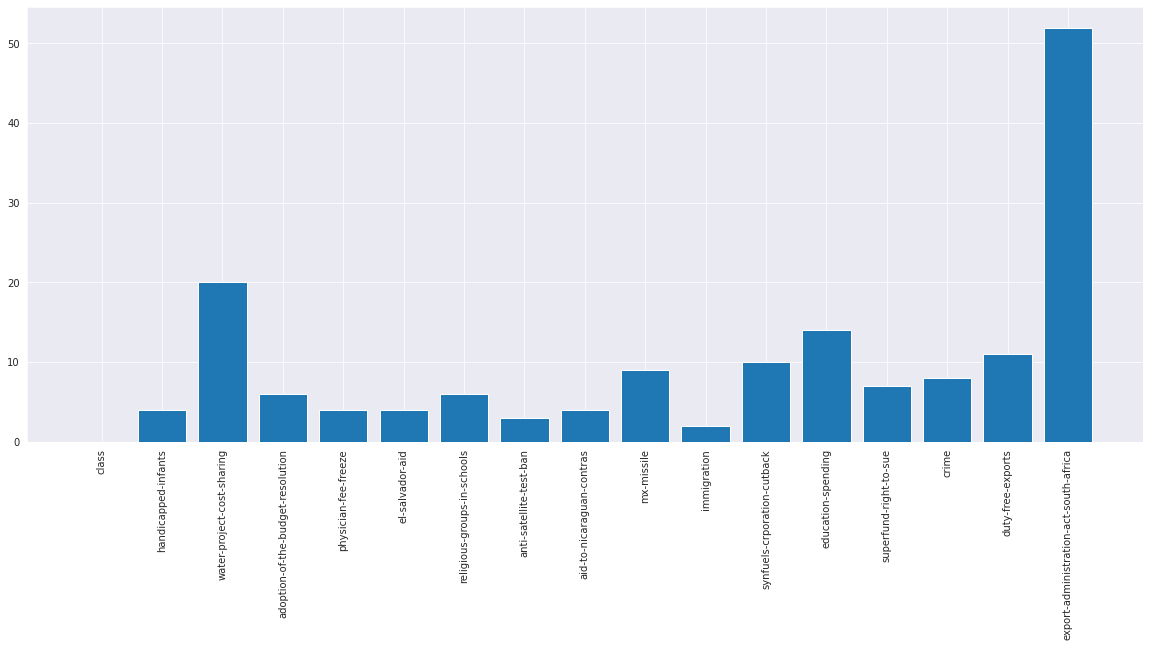

In [75]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
plt.bar(missing_values_feature.axes[0].to_list(), missing_values_feature.values)

**Missing data per column**

In [76]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data_columns = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_columns.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
export-administration-act-south-africa,23.853211
water-project-cost-sharing,9.174312
education-spending,6.422018
duty-free-exports,5.045872
synfuels-crporation-cutback,4.587156
mx-missile,4.128440
crime,3.669725
superfund-right-to-sue,3.211009
adoption-of-the-budget-resolution,2.752294
religious-groups-in-schools,2.752294


**Remove columns that have more than 30% (?) of missing values**

In [77]:
to_keep = list(missing_value_data_columns.index[missing_value_data_columns['percent_missing (%)'] < 30])
data = data[to_keep]
data

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,democrat,y,n,y,n,n,n,NaN,y,y,NaN,n,n,n,n,y,NaN
1,democrat,y,y,y,n,n,n,y,y,NaN,n,y,n,n,n,y,NaN
2,democrat,NaN,NaN,NaN,n,n,n,y,y,y,y,n,n,y,n,y,y
3,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
4,democrat,n,y,y,n,n,n,y,y,y,y,n,n,n,n,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,NaN
214,republican,n,n,n,y,y,y,n,n,n,n,n,y,y,y,y,n
215,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
216,republican,y,n,y,y,y,y,y,y,n,y,y,y,n,y,y,y


**Missing data per row**

In [78]:
#pd.set_option('display.max_rows', None)
percent_missing = (1 - data.apply(lambda x: x.count(), axis=1) / len(data.columns)) * 100
missing_value_data_rows = pd.DataFrame({'percent_missing (%)': percent_missing})
sort_data = missing_value_data_rows.copy()
sort_data.sort_values('percent_missing (%)', inplace=True, ascending=False)
sort_data

,percent_missing (%)
142,41.176471
50,35.294118
171,35.294118
43,29.411765
116,29.411765
...,...
92,0.000000
93,0.000000
94,0.000000
95,0.000000


**Remove rows that have more than 50% (?) of missing values**

In [79]:
#pd.set_option('display.max_rows', 10)
to_exclude = missing_value_data_rows[(missing_value_data_rows['percent_missing (%)'] >= 50)]
data = data.drop(to_exclude.index)
data.index = np.arange(1, len(data) + 1)
data.shape

(218, 17)

**Decision: Replace missing values with the class mode**

In [80]:
for y in data.select_dtypes(include=['object']).columns.tolist():
    mode_value = data[y].mode()
    data[y] = data[y].fillna(mode_value[0])    
    
data

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
1,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
2,democrat,y,y,y,n,n,n,y,y,n,n,y,n,n,n,y,y
3,democrat,n,n,y,n,n,n,y,y,y,y,n,n,y,n,y,y
4,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
5,democrat,n,y,y,n,n,n,y,y,y,y,n,n,n,n,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
215,republican,n,n,n,y,y,y,n,n,n,n,n,y,y,y,y,n
216,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
217,republican,y,n,y,y,y,y,y,y,n,y,y,y,n,y,y,y


**Check no missing data**

<AxesSubplot:>

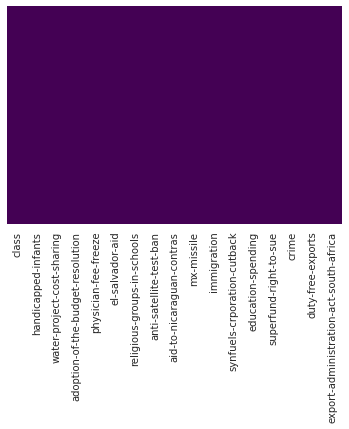

In [81]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Exploratory Data Analysis

**Class**

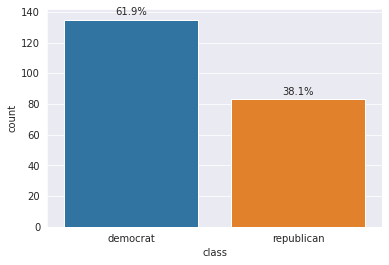

In [82]:
sns.set_style('darkgrid')
ax = sns.countplot(x = data['class'])

total = len(data['class'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/total),
            ha="center")

In [83]:
class                                      0
handicapped-infants                        4
water-project-cost-sharing                20
adoption-of-the-budget-resolution          6
physician-fee-freeze                       4
el-salvador-aid                            4
religious-groups-in-schools                6
anti-satellite-test-ban                    3
aid-to-nicaraguan-contras                  4
mx-missile                                 9
immigration                                2
synfuels-crporation-cutback               10
education-spending                        14
superfund-right-to-sue                     7
crime                                      8
duty-free-exports                         11
export-administration-act-south-africa    52

SyntaxError: invalid syntax (<ipython-input-83-5fb32b073fd1>, line 1)

**Class vs adoption-of-the-budget-resolution**

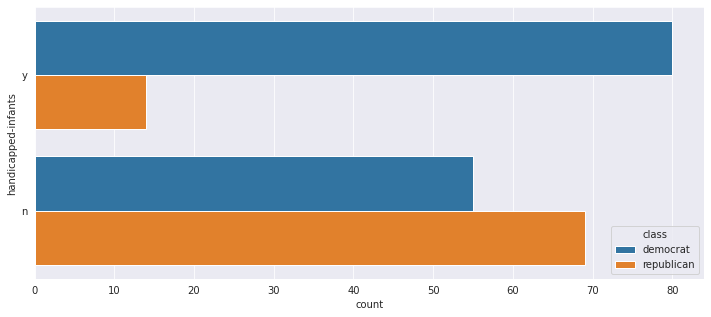

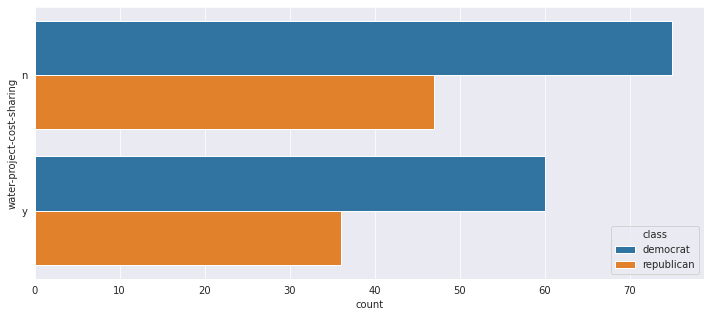

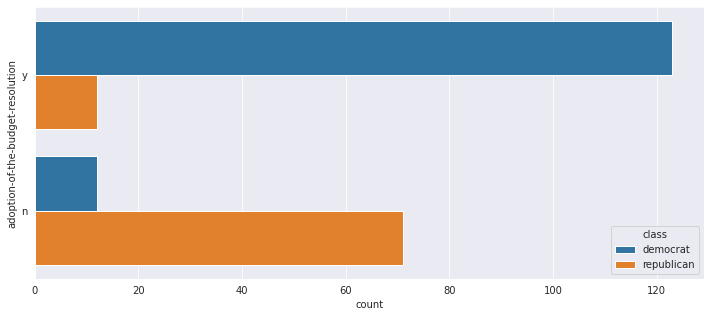

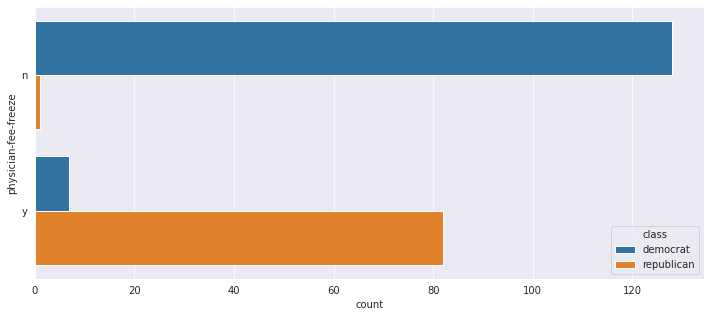

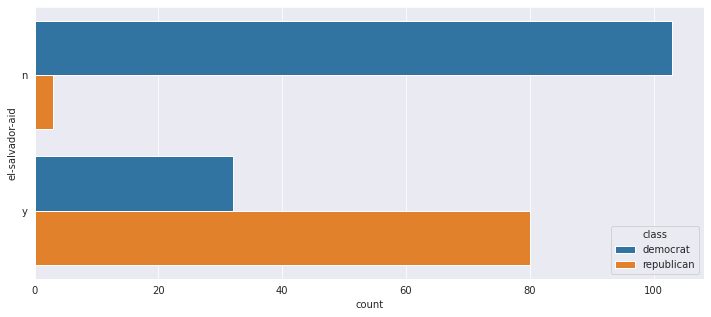

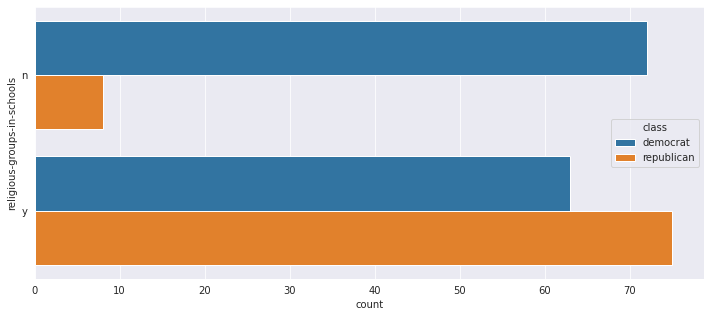

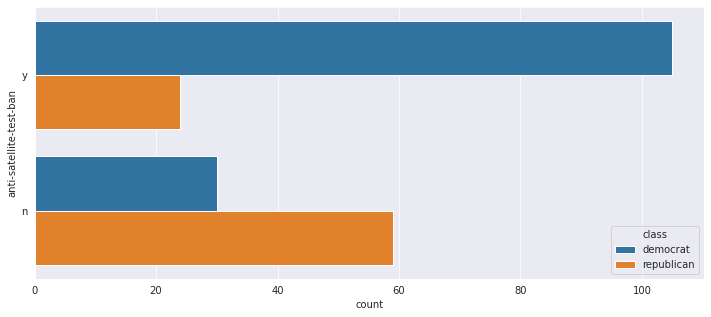

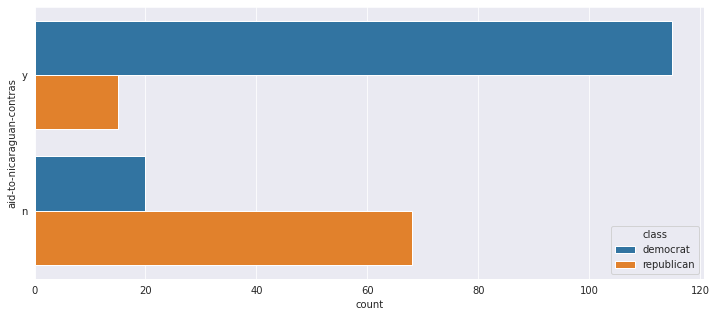

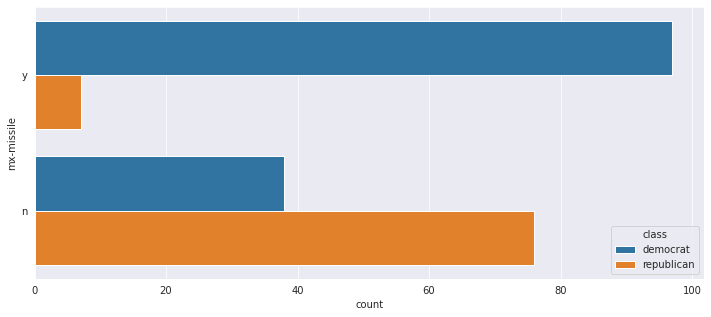

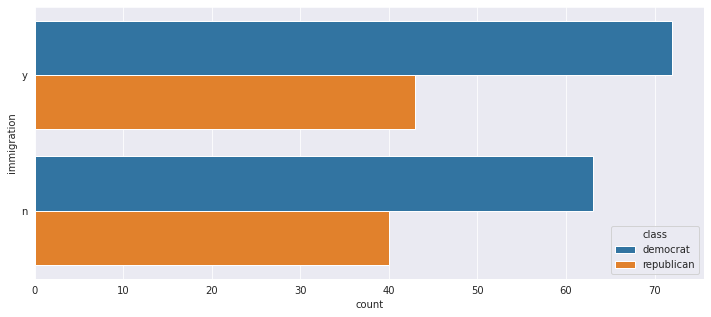

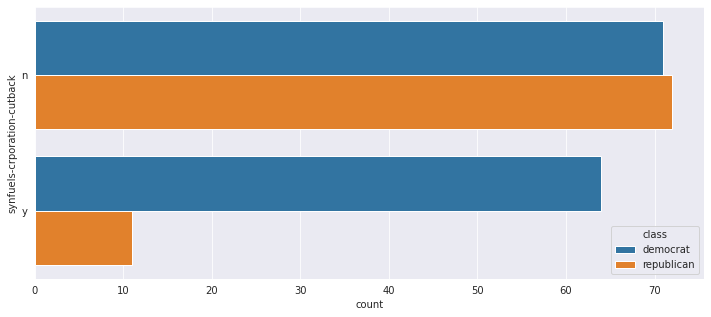

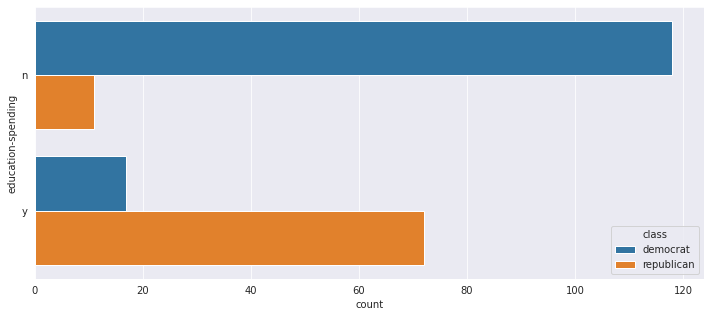

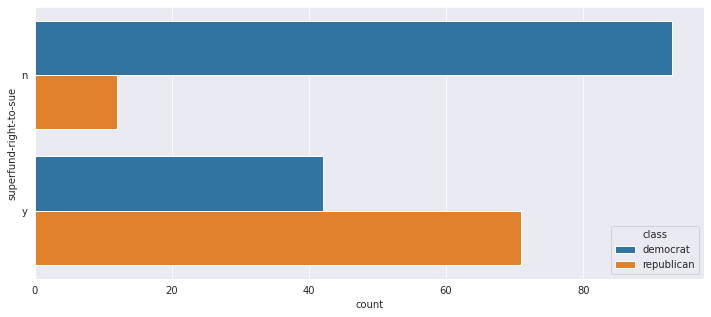

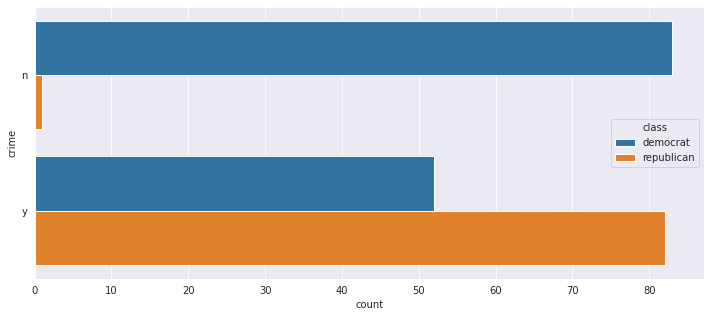

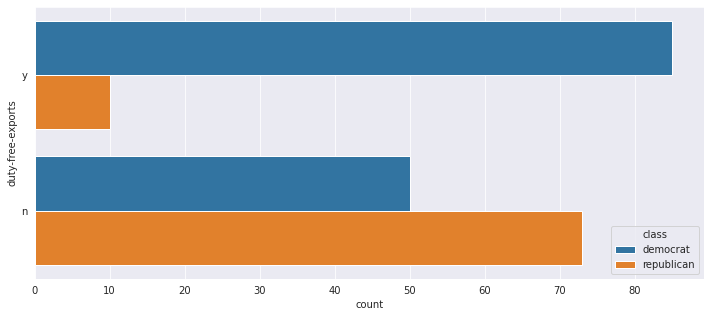

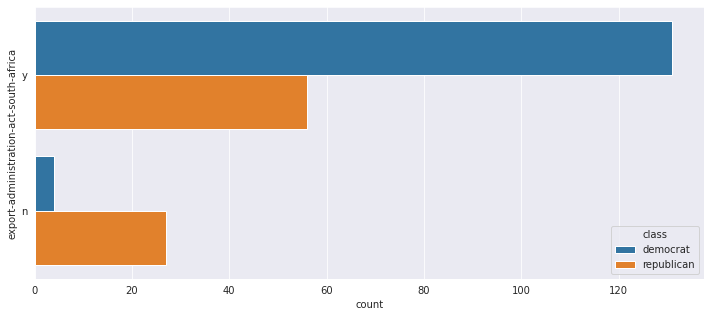

In [84]:
attributeNames = ['handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-crporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
for i in range(0,len(attributeNames)):
    
    plt.figure(figsize=(12, 5))
    sns.countplot(y=attributeNames[i], hue="class", data=data)#, palette=c_palette)
    if i == 3:
        plt.savefig(attributeNames[i] + ".png", bbox_inches='tight')
    plt.show()

**Replace 'n' and 'y' for a numeric value**

In [16]:
data.replace("n", 0, inplace = True)
data.replace("y", 1, inplace = True)

### Target Split

In [18]:
X = data.drop('class',axis=1)
y = data['class']

### Feature Selection

**Choose one of the methods:**
1. SelectPercentile (chi2)
2. SelectFromModel (LinearSVC)
3. SelectFromModel (LogisticRegression)
3. SelectFromModel (ExtraTreesClassifier)

In [19]:
featureselection_method = 0

In [20]:
if featureselection_method == 1:
    selection = SelectPercentile(chi2, percentile=50)
elif featureselection_method == 2:
    clf = LinearSVC()
    #clf = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
    selection = SelectFromModel(clf, prefit=False)
elif featureselection_method == 3:
    clf = LogisticRegression()
    #clf = LogisticRegression(C=0.2, penalty="l2", dual=False, max_iter=200).fit(X, y)
    selection = SelectFromModel(clf, prefit=False)
elif featureselection_method == 4:
    clf = ExtraTreesClassifier(n_estimators=50).fit(X, y)
    selection = SelectFromModel(clf, prefit=False)

#clf.feature_importances_ 
#X_transformed = selection.fit_transform(X, y)
#columns = np.asarray(X.columns.values)
#support = np.asarray(selection.get_support())
#columns_with_support = columns[support]
#X_transformed.shape

### Scaling

**Choose one of the methods:**
1. Standardization (StandardScaler)
2. Standardization (RobustScaler)
3. MinMaxScaler
4. Normalization

In [21]:
scaling_method = 0

In [22]:
if scaling_method == 1:
    scaler = StandardScaler()
    scaler = scaler.fit(X_transformed)
    X_scaled = scaler.transform(X_transformed)
elif scaling_method == 2:
    scaler = RobustScaler()
    scaler = scaler.fit(X_transformed)
    X_scaled = scaler.transform(X_transformed)
elif scaling_method == 3:
    scaler = preprocessing.MinMaxScaler()
    scaler = scaler.fit(X_transformed)
    X_scaled = scaler.transform(X_transformed)
elif scaling_method == 4:
    scaler = preprocessing.Normalizer()
    scaler = scaler.fit(X_transformed)
    X_scaled = scaler.transform(X_transformed)

In [23]:
X_scaled = X

### Outliers Detection

**Using mathematical function Z-Score**

In [24]:
z = np.abs(stats.zscore(X_scaled))
threshold = 3
outliers_rows = np.where(z > threshold)
print(np.where(z > threshold))
# The first array contains the list of row numbers and second array respective column numbers

(array([], dtype=int64), array([], dtype=int64))


In [25]:
len(set(outliers_rows[0]))

0

### Data Preparation

**Remove the identified outliers**

In [26]:
#X_prepared = X_scaled[(np.abs(stats.zscore(X_scaled)) < threshold).all(axis=1)]
#X_prepared = X_prepared.to_numpy()
#X_prepared.shape

In [27]:
y = y.drop(outliers_rows[0])
y = y.to_numpy()
y.shape

(218,)

In [28]:
X_prepared = X
X_prepared = X_prepared.to_numpy()

### Train Dataset Split

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.30)

### K-Fold Cross Validation

In [30]:
n_folds = 5

kf = KFold(n_splits = n_folds, random_state = None, shuffle = True)

### Models Prediction

**Types:**
- Linear Classifiers: Logistic Regression, Naive Bayes Classifier
- Nearest Neighbor
- Support Vector Machines
- Decision Trees
- Random Forest
- Neural Networks

In [31]:
d = {}

d["Logistic Regression"] = LogisticRegression()
d["Gaussian Naive Bayes"] = GaussianNB()

d["KNearest Neighbors"] = KNeighborsClassifier()

d["SVM rbf"] = SVC()
d["SGD Classifier"] = SGDClassifier()

d["Decision Tree"] = DecisionTreeClassifier()

d["Random Forest"] = RandomForestClassifier()

d["Multi-layer Perceptron Classifier"] = MLPClassifier(max_iter=1000)

In [32]:
scoreList = []
nameList = []

from sklearn.model_selection import cross_val_score

for name, clf in d.items():
    print("\n--------------",name,"---------------\n")
    start = time.time()
    i = 0
    final_score = 0
    mislabeled_points = 0
    for train_index, test_index in kf.split(X_prepared):
        i = i+1
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_prepared[train_index], X_prepared[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        score = accuracy_score(y_test, predictions)
        print("Fold", i, 'Accuracy: {0:.2%}'.format(score),\
             "-> %d mislabeled points of %d total points"% ((y_test != predictions).sum(),X_test.shape[0]))
        final_score = final_score + score
        mislabeled_points = mislabeled_points + (y_test != predictions).sum()

        if(i == n_folds):
            end = time.time()
            scoreList.append(final_score/n_folds)
            nameList.append(name)
            print('Final Accuracy: {0:.2%} -> Time: {1:.3} seconds'.format(final_score/n_folds, end - start),\
             "-> %d mislabeled points of %d total points\n"% (mislabeled_points, X_prepared.shape[0]))


-------------- Logistic Regression ---------------

Fold 1 Accuracy: 97.73% -> 1 mislabeled points of 44 total points
Fold 2 Accuracy: 95.45% -> 2 mislabeled points of 44 total points
Fold 3 Accuracy: 100.00% -> 0 mislabeled points of 44 total points
Fold 4 Accuracy: 95.35% -> 2 mislabeled points of 43 total points
Fold 5 Accuracy: 97.67% -> 1 mislabeled points of 43 total points
Final Accuracy: 97.24% -> Time: 0.0753 seconds -> 6 mislabeled points of 218 total points


-------------- Gaussian Naive Bayes ---------------

Fold 1 Accuracy: 90.91% -> 4 mislabeled points of 44 total points
Fold 2 Accuracy: 93.18% -> 3 mislabeled points of 44 total points
Fold 3 Accuracy: 100.00% -> 0 mislabeled points of 44 total points
Fold 4 Accuracy: 93.02% -> 3 mislabeled points of 43 total points
Fold 5 Accuracy: 90.70% -> 4 mislabeled points of 43 total points
Final Accuracy: 93.56% -> Time: 0.0134 seconds -> 14 mislabeled points of 218 total points


-------------- KNearest Neighbors -------------

In [33]:
ranking = sorted(zip(scoreList,nameList))[::-1]
print("\nClassifiers from best to worst:")
for i in range(0, len(ranking)):
    print(i+1, ') {0:35} Score: {1:.2%}'.format(ranking[i][1], ranking[i][0]))


Classifiers from best to worst:
1 ) Multi-layer Perceptron Classifier   Score: 97.71%
2 ) Random Forest                       Score: 97.26%
3 ) Logistic Regression                 Score: 97.24%
4 ) SVM rbf                             Score: 96.81%
5 ) SGD Classifier                      Score: 95.89%
6 ) Decision Tree                       Score: 94.96%
7 ) Gaussian Naive Bayes                Score: 93.56%
8 ) KNearest Neighbors                  Score: 92.23%


### Hyperparameter optimization

In [34]:
bestClassifierName = ranking[0][1]

In [35]:
if bestClassifierName == 'Logistic Regression':
    param_grid = {
    'penalty' : ['l1','l2'],
    'C': [0.1, 1, 10], 
    'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter': [100, 1000]}
    param_randomized = {}
elif bestClassifierName == 'Gaussian Naive Bayes':
    param_grid = {} 
    param_randomized = {}
elif bestClassifierName == 'KNearest Neighbors':
    param_grid = {
    'n_neighbors' : [3,5,7,11,13, 15, 17, 25, 30, 50],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']} 
    param_randomized = {}
elif bestClassifierName == 'SVM rbf':
    param_grid = {
    'class_weight': ['balanced', None], 
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001], 
    'kernel': ['rbf', 'linear']} 
    param_randomized = {}
elif bestClassifierName == 'SGD Classifier':
    param_grid = {} 
    param_randomized = {}
elif bestClassifierName == 'Decision Tree':
    param_grid = {} 
    param_randomized = {}
elif bestClassifierName == 'Random Forest':
    param_grid = {
    'n_estimators' : [10,20,30,50,100,200,1000],
    'max_depth' : [1, 10, 20, None],
    'bootstrap': [True, False],} 
    param_randomized = {}
elif bestClassifierName == 'Multi-layer Perceptron Classifier':
    param_grid = {
    'activation': ['identity', 'logistic','tanh','relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 1000],
    'alpha': 10.0 ** -np.arange(3, 7),
    'hidden_layer_sizes': [10, 20, 50, 100]} 
    param_randomized = {}

**GridSearchCV**

In [36]:
start = time.time()
clf_gridsearch = GridSearchCV(d.get(bestClassifierName), param_grid, verbose=0)
clf_gridsearch.fit(X_train, y_train)
print(clf_gridsearch.best_params_)
predictions = clf_gridsearch.predict(X_test)
score_gridsearch = accuracy_score(y_test, predictions)
end = time.time()
print(bestClassifierName, "GridSearchCV - Accuracy: %0.3f" % score_gridsearch, "- Time: %0.2f" % (end - start), "seconds")

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 10, 'learning_rate_init': 0.01, 'max_iter': 200}
Multi-layer Perceptron Classifier GridSearchCV - Accuracy: 0.953 - Time: 328.11 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**RandomizedSearchCV**

In [37]:
start = time.time()
clf_randomizedsearch = RandomizedSearchCV(d.get(bestClassifierName), param_randomized, random_state=0)
clf_randomizedsearch.fit(X_train, y_train)
print(clf_randomizedsearch.best_params_)
predictions = clf_randomizedsearch.predict(X_test)
score_randomizedsearch = accuracy_score(y_test, predictions)
end = time.time()
print(bestClassifierName, "RandomizedSearchCV - Accuracy: %0.3f" % score_randomizedsearch, "- Time: %0.2f" % (end - start), "seconds")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{}
Multi-layer Perceptron Classifier RandomizedSearchCV - Accuracy: 0.953 - Time: 4.53 seconds


In [38]:
if score_gridsearch > score_randomizedsearch:
    clf = clf_gridsearch.best_estimator_
else:
    clf = clf_randomizedsearch.best_estimator_

**Best Classifier with Hyper Parametrization**

In [39]:
clf

MLPClassifier(max_iter=1000)

### Test Data

In [40]:
testData = pd.read_csv('./184702-tu-ml-ws-20-congressional-voting/CongressionalVotingID.shuf.tes.csv')

In [41]:
testData

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,126,n,unknown,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,130,unknown,unknown,y,n,n,n,y,y,unknown,n,unknown,unknown,unknown,unknown,unknown,unknown
2,393,y,y,n,y,y,y,n,n,n,n,y,y,y,y,n,y
3,288,y,y,y,unknown,n,y,y,y,y,n,y,n,y,n,unknown,y
4,348,y,n,n,y,y,y,n,n,n,y,n,y,y,y,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,237,n,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
213,338,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
214,184,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,y,unknown,unknown,unknown,unknown,unknown,unknown,unknown
215,136,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,n


**Missing Data**

In [42]:
testData.replace("unknown", np.nan, inplace = True)

for i in testData.select_dtypes(include=['object']).columns.tolist():
    mode_value = testData[i].mode()
    testData[i] = testData[i].fillna(mode_value[0])  
    
testData.replace("n", 0, inplace = True)
testData.replace("y", 1, inplace = True)

In [43]:
testData

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,126,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,130,0,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1
2,393,1,1,0,1,1,1,0,0,0,0,1,1,1,1,0,1
3,288,1,1,1,0,0,1,1,1,1,0,1,0,1,0,0,1
4,348,1,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,237,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1
213,338,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1
214,184,0,1,1,0,1,1,1,1,1,0,0,0,1,1,0,1
215,136,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0


**Remove identifiers**

In [44]:
idsTest = testData['ID'].to_frame()
testData = testData.drop('ID',axis=1)

**Fit Classifier & Predict in all Training Data**

In [45]:
X_prepared.shape

(218, 16)

In [46]:
y.shape

(218,)

In [47]:
start = time.time()
# clf -> best estimator
predictions = cross_val_predict(clf, X_prepared, y, cv=5)
score = accuracy_score(y, predictions)
end = time.time()
print('Accuracy Training Data: {0:.2%} - Time: {1:.3} seconds\n'.format(score, end - start))

#print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

Accuracy Training Data: 95.87% - Time: 4.0 seconds

              precision    recall  f1-score   support

    democrat       0.97      0.96      0.97       135
  republican       0.94      0.95      0.95        83

    accuracy                           0.96       218
   macro avg       0.96      0.96      0.96       218
weighted avg       0.96      0.96      0.96       218



### Final Prediction

In [48]:
predictions = clf.predict(testData)

In [49]:
predictions

array(['republican', 'democrat', 'democrat', 'democrat', 'republican',
       'republican', 'republican', 'republican', 'republican',
       'republican', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'republican', 'democrat', 'republican', 'democrat',
       'democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'republican', 'democrat', 'republican', 'republican', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'republican', 'democrat', 'democrat', 'republican',
       'republican', 'democrat', 'democrat', 'democrat', 'republican',
       'democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'demo

### Join IDs to create Submission Dataset

In [50]:
predictions = pd.DataFrame(predictions, columns=['Class']) 

In [51]:
result = pd.concat([idsTest,predictions], axis=1)

In [52]:
result

,ID,Class
0,126,republican
1,130,democrat
2,393,democrat
3,288,democrat
4,348,republican
...,...,...
212,237,democrat
213,338,democrat
214,184,democrat
215,136,republican


In [53]:
result.to_csv('submission.csv', index=False)